In [697]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [698]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [699]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [700]:
# import necessary modules

import yfinance as Yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np



In [701]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'All_coins_kaggle.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

print(df)
# Covert data to dataframe
crypto_df = df
crypto_df.head()


       Unnamed: 0          Name                 Date      High       Low  \
0               0  Binance Coin  2017-07-26 23:59:59  0.109013  0.099266   
1               1  Binance Coin  2017-07-27 23:59:59  0.108479  0.100888   
2               2  Binance Coin  2017-07-28 23:59:59  0.109019  0.101473   
3               3  Binance Coin  2017-07-29 23:59:59  0.111264  0.101108   
4               4  Binance Coin  2017-07-30 23:59:59  0.108138  0.103162   
...           ...           ...                  ...       ...       ...   
17417       17417           XRP  2021-07-01 23:59:59  0.704785  0.646796   
17418       17418           XRP  2021-07-02 23:59:59  0.667287  0.634726   
17419       17419           XRP  2021-07-03 23:59:59  0.683677  0.644653   
17420       17420           XRP  2021-07-04 23:59:59  0.707783  0.665802   
17421       17421           XRP  2021-07-05 23:59:59  0.695653  0.648492   

           Open     Close        Volume     Marketcap  
0      0.105893  0.105138  2.00

Unnamed: 0          Name                 Date      High       Low  \
0           0  Binance Coin  2017-07-26 23:59:59  0.109013  0.099266   
1           1  Binance Coin  2017-07-27 23:59:59  0.108479  0.100888   
2           2  Binance Coin  2017-07-28 23:59:59  0.109019  0.101473   
3           3  Binance Coin  2017-07-29 23:59:59  0.111264  0.101108   
4           4  Binance Coin  2017-07-30 23:59:59  0.108138  0.103162   

       Open     Close    Volume   Marketcap  
0  0.105893  0.105138  200395.0  10513800.0  
1  0.105108  0.107737  344499.0  10773700.0  
2  0.107632  0.104067  342568.0  10406700.0  
3  0.104782  0.107811  340218.0  10781100.0  
4  0.107935  0.106414  224261.0  10641400.0

In [702]:
# Check no null value in crypto_df
crypto_df.isna().sum()

Unnamed: 0    0
Name          0
Date          0
High          0
Low           0
Open          0
Close         0
Volume        0
Marketcap     0
dtype: int64

In [703]:
crypto_df.dtypes

Unnamed: 0      int64
Name           object
Date           object
High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Marketcap     float64
dtype: object

In [704]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and 'datetime_column_name' is the name of your datetime column
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])
crypto_df['Date'] = crypto_df['Date'].astype('int64') // 10**9


# Handle missing values
crypto_df.fillna(method='ffill', inplace=True)

# Creating a new target column (modify this according to your analysis needs)
crypto_df['Target'] = (crypto_df['Close'] > crypto_df['Open']).astype(int)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Split the data into features and target
X = scaled_features
y = crypto_df['Target']

# The data is now preprocessed


C:\Users\nency\AppData\Local\Temp\ipykernel_28552\124057422.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_df.fillna(method='ffill', inplace=True)


In [705]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Print all column names in the DataFrame
print("Column names in the DataFrame:")
print(crypto_df.columns)

# Replace 'target' with the actual name of your target column
target_column_name = 'close'  # Change this to the actual name of your target column

if target_column_name in df.columns:
    X = crypto_df.drop(target_column_name, axis=1)  # Feature matrix
    y = crypto_df[target_column_name]  # Target variable

    # Rest of your code for feature selection...
else:
    print(f"Column '{target_column_name}' not found in the DataFrame.")

Column names in the DataFrame:
Index(['Unnamed: 0', 'Name', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Target'],
      dtype='object')
Column 'close' not found in the DataFrame.


In [706]:

#giving name to unnamed column
crypto_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
crypto_df['Date'] = pd.to_datetime(df['Date'], unit='s')


In [707]:
# Set index for Date
crypto_df = crypto_df.set_index("Date")
crypto_df.head()

id          Name      High       Low      Open     Close  \
Date                                                                            
2017-07-26 23:59:59   0  Binance Coin  0.109013  0.099266  0.105893  0.105138   
2017-07-27 23:59:59   1  Binance Coin  0.108479  0.100888  0.105108  0.107737   
2017-07-28 23:59:59   2  Binance Coin  0.109019  0.101473  0.107632  0.104067   
2017-07-29 23:59:59   3  Binance Coin  0.111264  0.101108  0.104782  0.107811   
2017-07-30 23:59:59   4  Binance Coin  0.108138  0.103162  0.107935  0.106414   

                       Volume   Marketcap  Target  
Date                                               
2017-07-26 23:59:59  200395.0  10513800.0       0  
2017-07-27 23:59:59  344499.0  10773700.0       1  
2017-07-28 23:59:59  342568.0  10406700.0       0  
2017-07-29 23:59:59  340218.0  10781100.0       1  
2017-07-30 23:59:59  224261.0  10641400.0       0

In [708]:
# Creating a new column 'assetid' with default values
crypto_df.insert(loc=len(crypto_df.columns), column='assetid', value=0)

# Generating a mapping from unique names to integers
unique_names = crypto_df['Name'].unique()
name_to_id = {name: idx + 1 for idx, name in enumerate(unique_names)}

# Applying the mapping to the 'Name' column to fill 'assetid'
crypto_df['assetid'] = crypto_df['Name'].map(name_to_id)


In [709]:
crypto_df

id          Name      High       Low      Open  \
Date                                                                     
2017-07-26 23:59:59      0  Binance Coin  0.109013  0.099266  0.105893   
2017-07-27 23:59:59      1  Binance Coin  0.108479  0.100888  0.105108   
2017-07-28 23:59:59      2  Binance Coin  0.109019  0.101473  0.107632   
2017-07-29 23:59:59      3  Binance Coin  0.111264  0.101108  0.104782   
2017-07-30 23:59:59      4  Binance Coin  0.108138  0.103162  0.107935   
...                    ...           ...       ...       ...       ...   
2021-07-01 23:59:59  17417           XRP  0.704785  0.646796  0.704785   
2021-07-02 23:59:59  17418           XRP  0.667287  0.634726  0.659890   
2021-07-03 23:59:59  17419           XRP  0.683677  0.644653  0.655639   
2021-07-04 23:59:59  17420           XRP  0.707783  0.665802  0.673218   
2021-07-05 23:59:59  17421           XRP  0.695653  0.648492  0.695653   

                        Close        Volume     Marketcap  Target  assetid  
Date                                                                        
2017-07-26 23:59:59  0.105138  2.003950e+05  1.051380e+07       0        1  
2017-07-27 23:59:59  0.107737  3.444990e+05  1.077370e+07       1        1  
2017-07-28 23:59:59  0.104067  3.425680e+05  1.040670e+07       0        1  
2017-07-29 23:59:59  0.107811  3.402180e+05  1.078110e+07       1        1  
2017-07-30 23:59:59  0.106414  2.242610e+05  1.064140e+07       0        1  
...                       ...           ...           ...     ...      ...  
2021-07-01 23:59:59  0.661180  2.553971e+09  3.051144e+10       0       10  
2021-07-02 23:59:59  0.656763  2.061607e+09  3.030759e+10       0       10  
2021-07-03 23:59:59  0.672888  1.872820e+09  3.105172e+10       1       10  
2021-07-04 23:59:59  0.694945  1.885242e+09  3.206960e+10       1       10  
2021-07-05 23:59:59  0.654300  2.076373e+09  3.019395e+10       0       10  

[17422 rows x 10 columns]

In [710]:
# First, ensure the index is sorted
crypto_df.sort_index(inplace=True)

# Then, perform the slicing. If the exact dates might not exist, consider using the closest valid dates within the range
start_date = '2019-07-06'
end_date = '2021-07-06'

# Adjusting start and end dates if they're outside the index's bounds
if start_date < str(crypto_df.index.min()):
    start_date = str(crypto_df.index.min())

if end_date > str(crypto_df.index.max()):
    end_date = str(crypto_df.index.max())

crypto_df = crypto_df.loc[start_date:end_date].reset_index()


In [711]:
crypto_df

Date     id          Name          High           Low  \
0    2019-07-06 23:59:59  14865        Tether      1.009563      0.994577   
1    2019-07-06 23:59:59   5735      Dogecoin      0.003968      0.003470   
2    2019-07-06 23:59:59  11213        Monero     98.973083     89.133718   
3    2019-07-06 23:59:59    710  Binance Coin     33.319241     32.479437   
4    2019-07-06 23:59:59   7561      Ethereum    295.991415    286.665872   
...                  ...    ...           ...           ...           ...   
7305 2021-07-05 23:59:59   8291      Ethereum   2321.922836   2163.041394   
7306 2021-07-05 23:59:59   6465      Dogecoin      0.246419      0.227838   
7307 2021-07-05 23:59:59   3266       Bitcoin  35284.344430  33213.661034   
7308 2021-07-05 23:59:59   1440  Binance Coin    307.684855    293.523465   
7309 2021-07-05 23:59:59  17421           XRP      0.695653      0.648492   

              Open         Close        Volume     Marketcap  Target  assetid  
0         1.001392      0.997410  2.081464e+10  3.688690e+09       0        9  
1         0.003872      0.003547  6.503178e+07  4.264218e+08       0        4  
2        89.141267     93.939510  1.907449e+08  1.604838e+09       1        7  
3        32.711335     32.530940  1.872474e+08  4.592571e+09       0        1  
4       287.893815    287.547126  7.674615e+09  3.070779e+10       0        5  
...            ...           ...           ...           ...     ...      ...  
7305   2321.922836   2198.582464  2.010379e+10  2.562978e+11       0        5  
7306      0.246419      0.231614  1.267949e+09  3.018344e+10       0        4  
7307  35284.344430  33746.002456  2.672155e+10  6.326962e+11       0        2  
7308    307.684855    302.377980  1.504870e+09  4.639473e+10       0        1  
7309      0.695653      0.654300  2.076373e+09  3.019395e+10       0       10  

[7310 rows x 11 columns]

In [712]:
# For Binance Coin
bnb = crypto_df[crypto_df["assetid"]==1] 
bnb.head()

Date   id          Name       High        Low       Open  \
3  2019-07-06 23:59:59  710  Binance Coin  33.319241  32.479437  32.711335   
13 2019-07-07 23:59:59  711  Binance Coin  33.492957  32.450660  32.521632   
22 2019-07-08 23:59:59  712  Binance Coin  34.250313  33.097659  33.263501   
35 2019-07-09 23:59:59  713  Binance Coin  33.951302  32.533198  33.471279   
40 2019-07-10 23:59:59  714  Binance Coin  32.974997  30.956919  32.703180   

        Close        Volume     Marketcap  Target  assetid  
3   32.530940  1.872474e+08  4.592571e+09       0        1  
13  33.241061  1.988594e+08  4.692823e+09       1        1  
22  33.469681  2.576988e+08  4.725099e+09       1        1  
35  32.707650  2.109044e+08  4.617518e+09       0        1  
40  31.477377  2.705117e+08  4.443834e+09       0        1

In [713]:
# For Bitcoin
btc = crypto_df[crypto_df["assetid"]==2] 
btc.head()

Date    id     Name          High           Low  \
9  2019-07-06 23:59:59  2536  Bitcoin  11620.965153  10982.543914   
18 2019-07-07 23:59:59  2537  Bitcoin  11541.619873  11148.804813   
21 2019-07-08 23:59:59  2538  Bitcoin  12345.833146  11393.374313   
37 2019-07-09 23:59:59  2539  Bitcoin  12779.132097  12233.262031   
42 2019-07-10 23:59:59  2540  Bitcoin  13129.528934  11710.978415   

            Open         Close        Volume     Marketcap  Target  assetid  
9   10982.543914  11208.550845  2.109202e+10  1.995461e+11       1        2  
18  11217.615934  11450.846755  1.936904e+10  2.038819e+11       1        2  
21  11446.597155  12285.958217  2.348255e+10  2.187784e+11       1        2  
37  12284.326465  12573.812941  2.816792e+10  2.239281e+11       1        2  
42  12571.537162  12156.512631  3.362757e+10  2.165160e+11       0        2

In [714]:
# For Cardano
cda = crypto_df[crypto_df["assetid"]==3] 
cda.head()

Date    id     Name      High       Low      Open     Close  \
5  2019-07-06 23:59:59  3909  Cardano  0.080290  0.076289  0.076518  0.077335   
12 2019-07-07 23:59:59  3910  Cardano  0.080261  0.076982  0.077346  0.079964   
26 2019-07-08 23:59:59  3911  Cardano  0.082259  0.079004  0.079932  0.080476   
33 2019-07-09 23:59:59  3912  Cardano  0.080821  0.077354  0.080452  0.077993   
45 2019-07-10 23:59:59  3913  Cardano  0.078322  0.069825  0.078012  0.071940   

          Volume     Marketcap  Target  assetid  
5   1.289617e+08  2.005081e+09       1        3  
12  1.049846e+08  2.073227e+09       1        3  
26  1.143395e+08  2.086511e+09       1        3  
33  1.229354e+08  2.022136e+09       0        3  
45  1.199997e+08  1.865187e+09       0        3

In [715]:
# For Dogecoin Coin
doge = crypto_df[crypto_df["assetid"]==4] 
doge.head()

Date    id      Name      High       Low      Open  \
1  2019-07-06 23:59:59  5735  Dogecoin  0.003968  0.003470  0.003872   
17 2019-07-07 23:59:59  5736  Dogecoin  0.003658  0.003495  0.003553   
28 2019-07-08 23:59:59  5737  Dogecoin  0.003644  0.003513  0.003635   
30 2019-07-09 23:59:59  5738  Dogecoin  0.003615  0.003459  0.003556   
46 2019-07-10 23:59:59  5739  Dogecoin  0.003600  0.003364  0.003551   

       Close        Volume     Marketcap  Target  assetid  
1   0.003547  6.503178e+07  4.264218e+08       0        4  
17  0.003633  4.437965e+07  4.368922e+08       1        4  
28  0.003559  4.168271e+07  4.279754e+08       0        4  
30  0.003549  4.261383e+07  4.268614e+08       0        4  
46  0.003424  4.907858e+07  4.118467e+08       0        4

In [716]:
# For Ethereum Coin
eth = crypto_df[crypto_df["assetid"]==5] 
eth.head()

Date    id      Name        High         Low        Open  \
4  2019-07-06 23:59:59  7561  Ethereum  295.991415  286.665872  287.893815   
16 2019-07-07 23:59:59  7562  Ethereum  310.139320  286.109200  287.603612   
20 2019-07-08 23:59:59  7563  Ethereum  314.267880  303.500454  305.734786   
36 2019-07-09 23:59:59  7564  Ethereum  318.223116  305.285814  313.325174   
47 2019-07-10 23:59:59  7565  Ethereum  313.069445  285.565783  308.851274   

         Close        Volume     Marketcap  Target  assetid  
4   287.547126  7.674615e+09  3.070779e+10       0        5  
16  305.700560  8.119725e+09  3.265061e+10       1        5  
20  313.251404  9.078906e+09  3.346137e+10       1        5  
36  308.881017  1.005516e+10  3.299875e+10       0        5  
47  290.002318  1.167999e+10  3.098583e+10       0        5

In [717]:
# For Litecoin Coin
ltc = crypto_df[crypto_df["assetid"]==6] 
ltc.head()

Date    id      Name        High         Low        Open  \
8  2019-07-06 23:59:59  9387  Litecoin  121.294059  117.327119  118.378719   
15 2019-07-07 23:59:59  9388  Litecoin  120.325262  117.641090  118.026007   
29 2019-07-08 23:59:59  9389  Litecoin  125.082014  118.598566  120.283494   
39 2019-07-09 23:59:59  9390  Litecoin  124.165418  118.228096  123.247104   
49 2019-07-10 23:59:59  9391  Litecoin  120.104316  103.822187  119.500997   

         Close        Volume     Marketcap  Target  assetid  
8   117.823620  3.484378e+09  7.369731e+09       0        6  
15  120.320878  3.348662e+09  7.527688e+09       1        6  
29  123.285485  3.803750e+09  7.714782e+09       1        6  
39  119.432812  3.785641e+09  7.475394e+09       0        6  
49  108.500258  4.699512e+09  6.792744e+09       0        6

In [718]:
# For Monero Coin
mnr = crypto_df[crypto_df["assetid"]==7] 
mnr.head()

Date     id    Name        High         Low        Open  \
2  2019-07-06 23:59:59  11213  Monero   98.973083   89.133718   89.141267   
11 2019-07-07 23:59:59  11214  Monero  107.183223   93.171777   93.987344   
27 2019-07-08 23:59:59  11215  Monero  107.318136  100.808772  107.095709   
31 2019-07-09 23:59:59  11216  Monero  104.544312   98.013804  101.597207   
43 2019-07-10 23:59:59  11217  Monero  101.600619   92.546622   99.450257   

         Close        Volume     Marketcap  Target  assetid  
2    93.939510  1.907449e+08  1.604838e+09       1        7  
11  107.183223  1.827199e+08  1.831299e+09       1        7  
27  101.586491  1.558289e+08  1.735766e+09       0        7  
31   99.418083  1.246283e+08  1.698715e+09       0        7  
43   94.937034  1.421325e+08  1.622149e+09       0        7

In [719]:
# For Stellar Coin
tlr = crypto_df[crypto_df["assetid"]==8] 
tlr.head()

Date     id     Name      High       Low      Open  \
7  2019-07-06 23:59:59  13039  Stellar  0.104214  0.099892  0.099892   
19 2019-07-07 23:59:59  13040  Stellar  0.105794  0.102183  0.102927   
25 2019-07-08 23:59:59  13041  Stellar  0.106230  0.103909  0.104994   
38 2019-07-09 23:59:59  13042  Stellar  0.105964  0.101105  0.105082   
44 2019-07-10 23:59:59  13043  Stellar  0.102489  0.093288  0.101836   

       Close        Volume     Marketcap  Target  assetid  
7   0.102875  2.553865e+08  1.998355e+09       1        8  
19  0.105054  2.356726e+08  2.040677e+09       1        8  
25  0.105023  2.654927e+08  2.040086e+09       1        8  
38  0.101834  3.825653e+08  1.978200e+09       0        8  
44  0.095057  4.237442e+08  1.846557e+09       0        8

In [720]:
# For Tether Coin
thr = crypto_df[crypto_df["assetid"]==9] 
thr.head()

Date     id    Name      High       Low      Open     Close  \
0  2019-07-06 23:59:59  14865  Tether  1.009563  0.994577  1.001392  0.997410   
10 2019-07-07 23:59:59  14866  Tether  1.008509  0.994346  0.997018  1.002450   
24 2019-07-08 23:59:59  14867  Tether  1.009988  0.995300  1.002688  1.004626   
32 2019-07-09 23:59:59  14868  Tether  1.018833  1.000392  1.004736  1.002220   
48 2019-07-10 23:59:59  14869  Tether  1.014175  0.995900  1.001773  0.999782   

          Volume     Marketcap  Target  assetid  
0   2.081464e+10  3.688690e+09       0        9  
10  1.984039e+10  3.710332e+09       1        9  
24  2.282095e+10  3.778152e+09       1        9  
32  2.693381e+10  3.847192e+09       0        9  
48  3.390784e+10  3.844539e+09       0        9

In [721]:
# For XRP Coin
xrp = crypto_df[crypto_df["assetid"]==10] 
xrp.head()

Date     id Name      High       Low      Open     Close  \
6  2019-07-06 23:59:59  16691  XRP  0.408374  0.378463  0.379139  0.389055   
14 2019-07-07 23:59:59  16692  XRP  0.398887  0.387624  0.389503  0.397047   
23 2019-07-08 23:59:59  16693  XRP  0.402690  0.392328  0.397261  0.401533   
34 2019-07-09 23:59:59  16694  XRP  0.406549  0.391286  0.401645  0.394168   
41 2019-07-10 23:59:59  16695  XRP  0.397920  0.352078  0.394857  0.363775   

          Volume     Marketcap  Target  assetid  
6   1.521410e+09  1.656075e+10       1       10  
14  1.210814e+09  1.690095e+10       1       10  
23  1.253488e+09  1.709188e+10       1       10  
34  1.413299e+09  1.677839e+10       0       10  
41  2.300686e+09  1.548466e+10       0       10

In [722]:
def to2018(df):
    df18=equalize(df,bit)
    return df18.iloc[:len(bit18)]

def equalize(df,dfs):
    low=len(dfs)
    high=len(df)
    dff=high-low
    
    return df.iloc[dff:]

C:\Users\nency\AppData\Local\Temp\ipykernel_28552\2469646775.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C',palette ='coolwarm',ax=axs[row][pos])
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\2469646775.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C',palette ='coolwarm',ax=axs[row][pos])
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\2469646775.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C',palette ='coolwarm',ax=axs[row][pos])
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\2469646775.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C

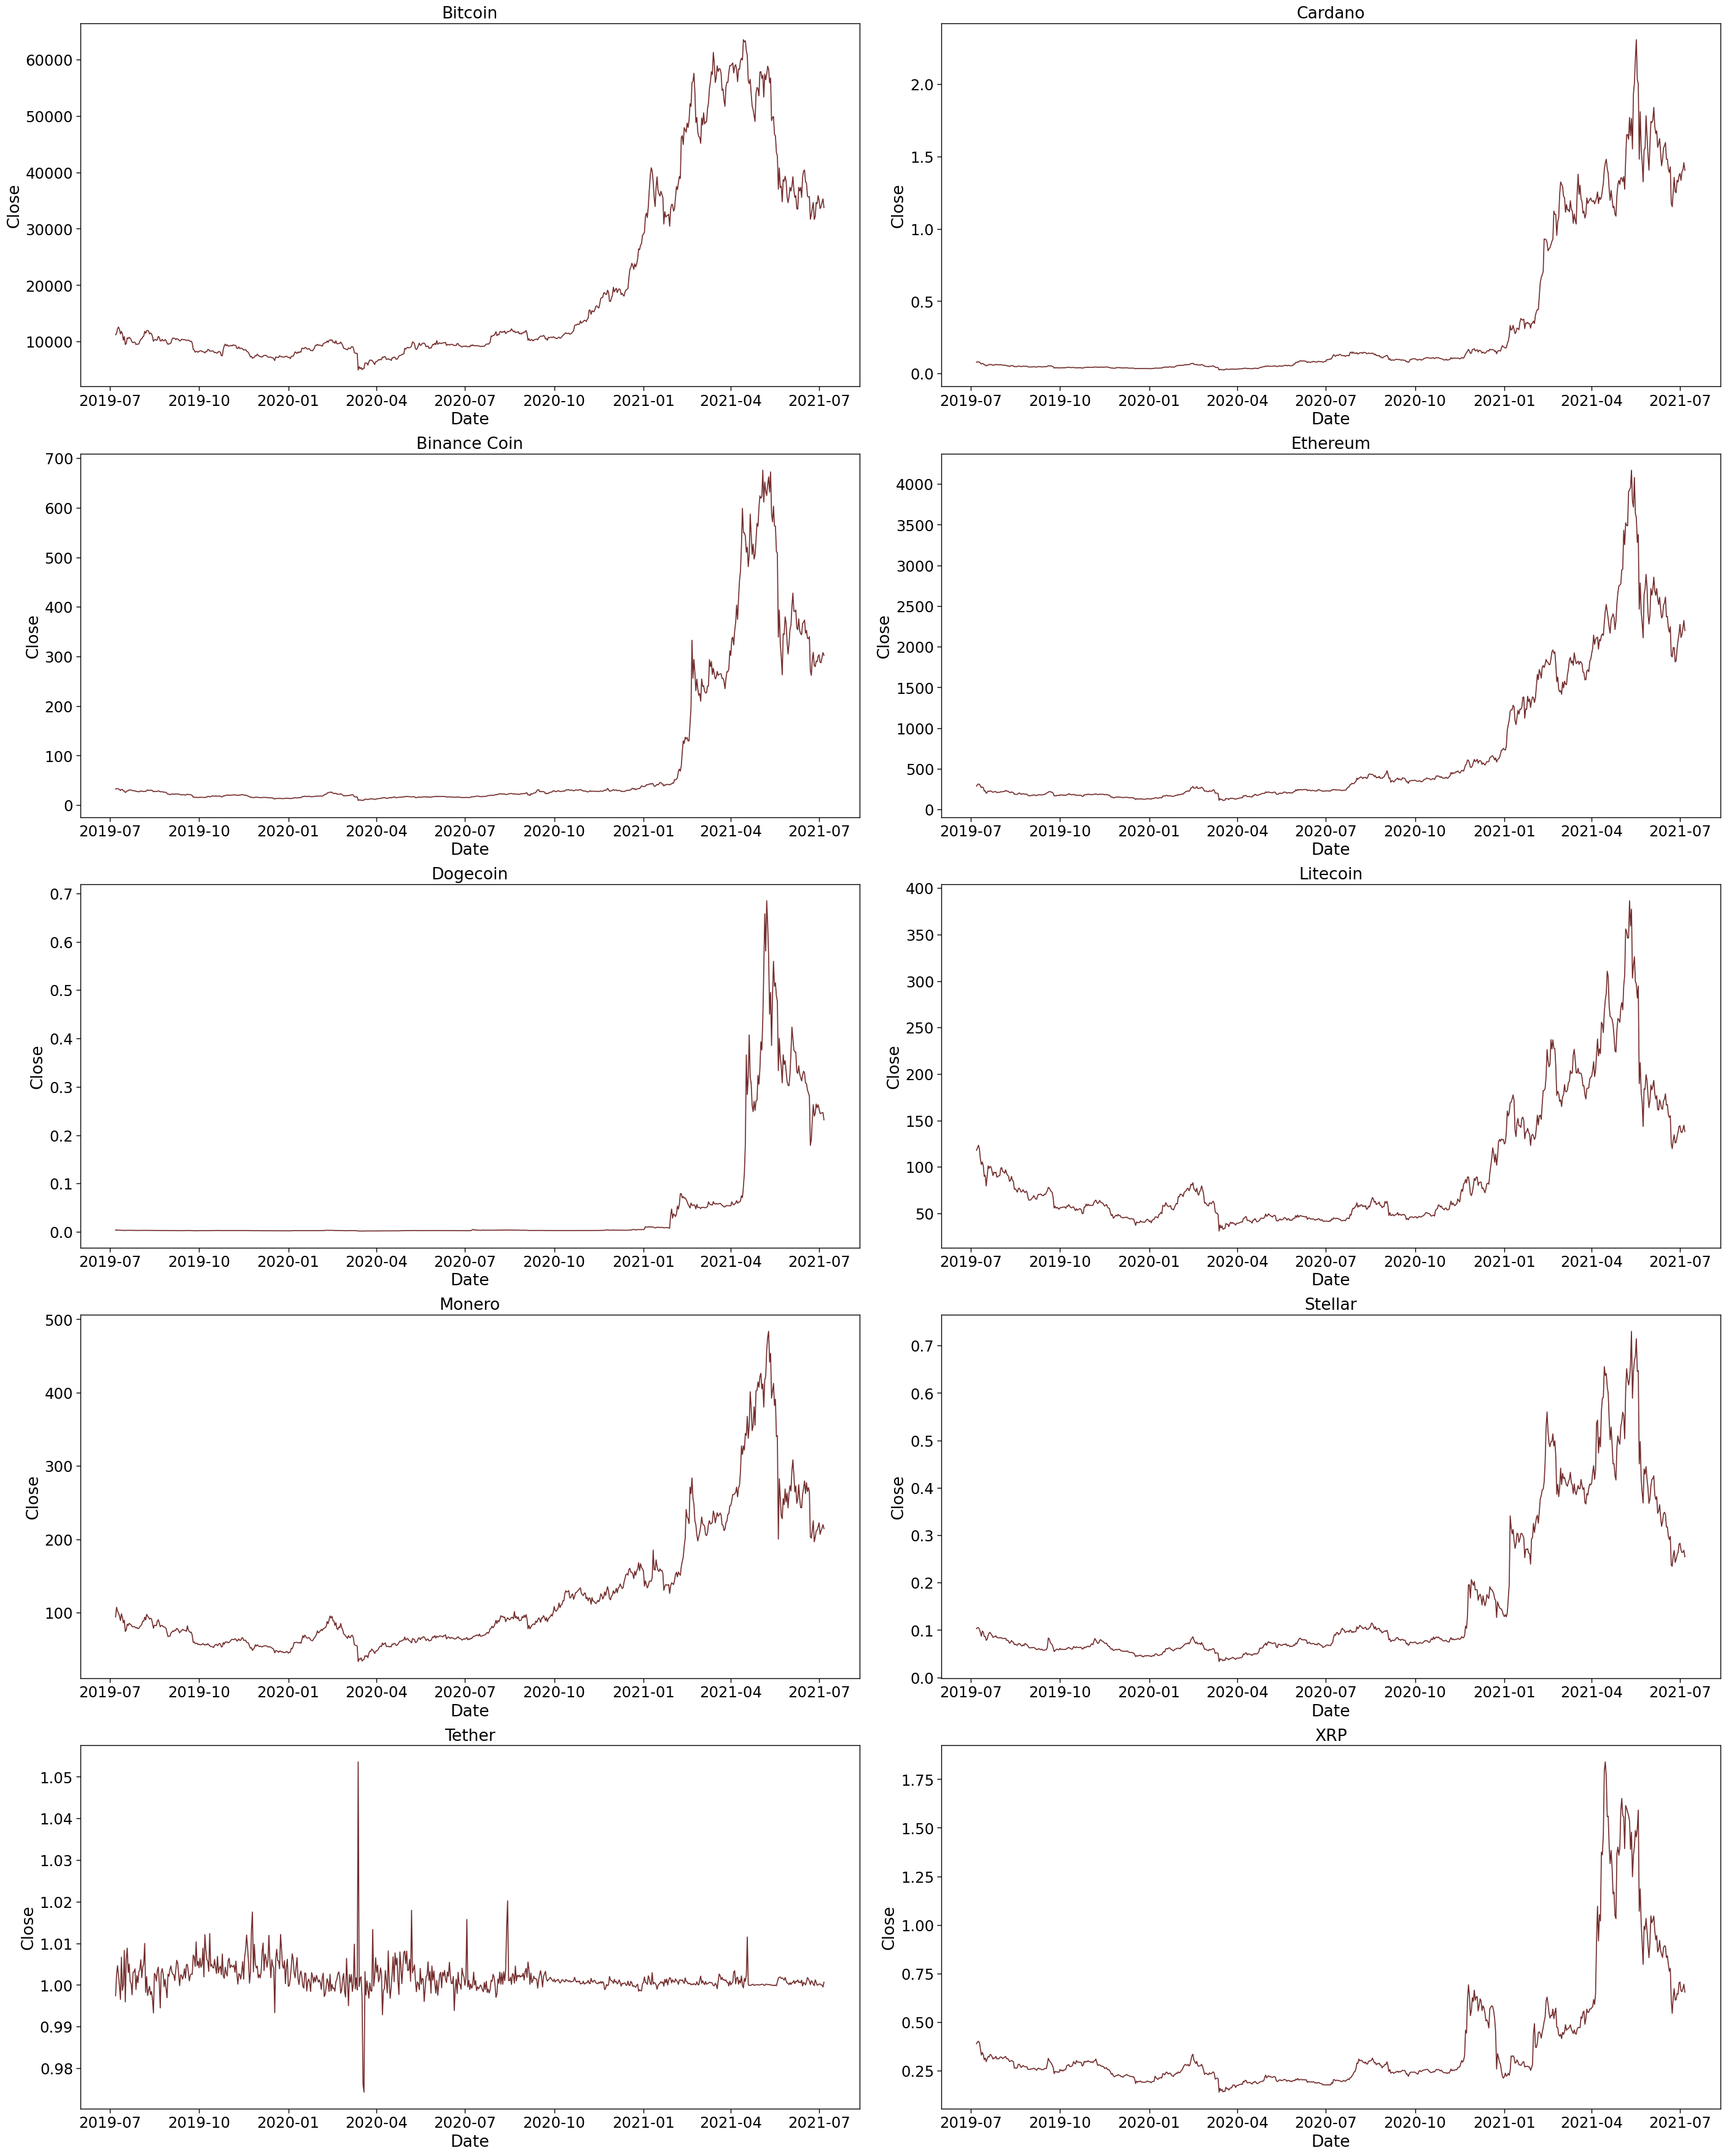

In [723]:
# Lineplot for each coin
crypto=["Bitcoin","Cardano","Binance Coin","Ethereum","Dogecoin","Litecoin","Monero","Stellar","Tether","XRP"]
cryptoDf=[btc,cda,bnb,eth,doge,ltc,mnr,tlr,thr,xrp]
num_plots = 10
total_cols = 2
total_rows = 5
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(14*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    sns.set_context('paper', font_scale = 2)
    plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C',palette ='coolwarm',ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])

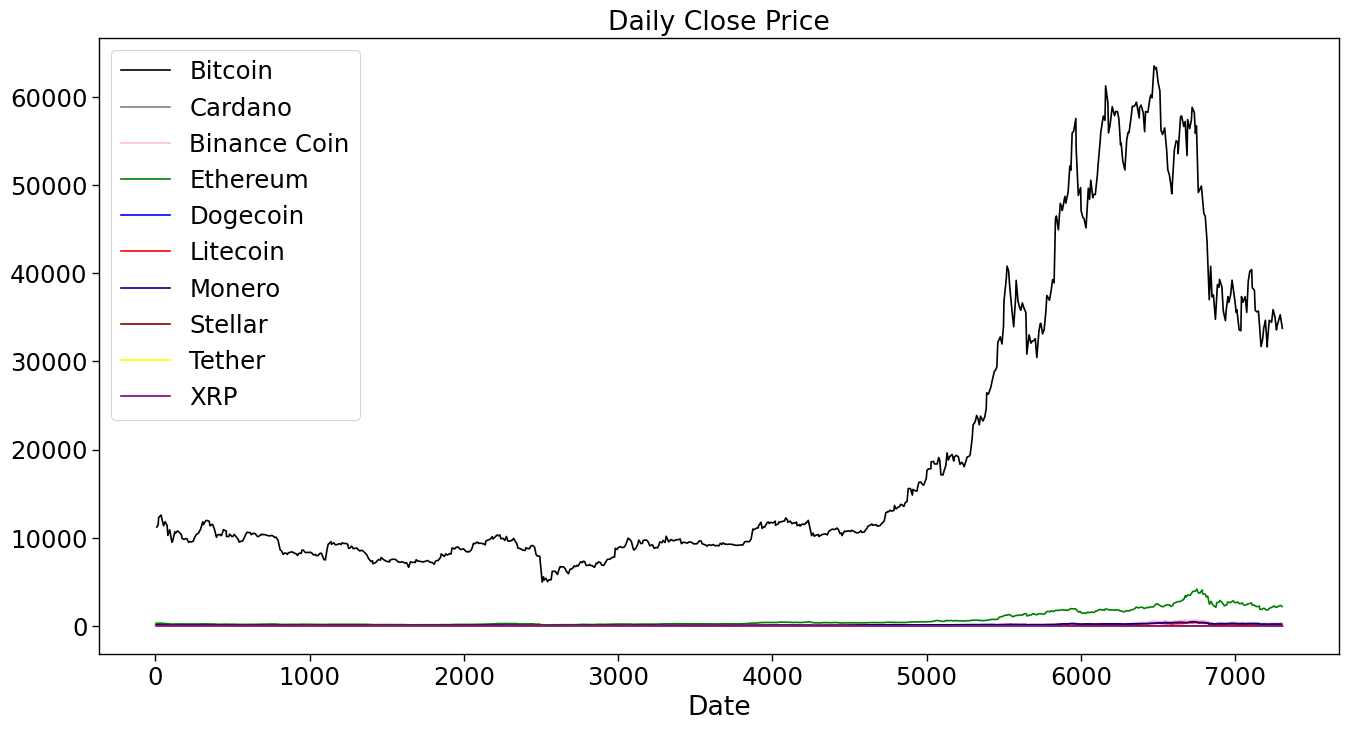

In [724]:
# Combine daily close price of all coins in one chart
plt.figure(figsize=(16,8))
btc['Close'].plot(label='Bitcoin', color="black")
cda['Close'].plot(label='Cardano', color="gray")
bnb['Close'].plot(label='Binance Coin', color="pink")
eth['Close'].plot(label='Ethereum', color="green")
doge['Close'].plot(label='Dogecoin', color="blue")
ltc['Close'].plot(label='Litecoin', color="red")
mnr['Close'].plot(label='Monero', color="darkblue")
tlr['Close'].plot(label='Stellar', color="darkred")
thr['Close'].plot(label='Tether', color="yellow")
xrp['Close'].plot(label='XRP', color="purple")

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

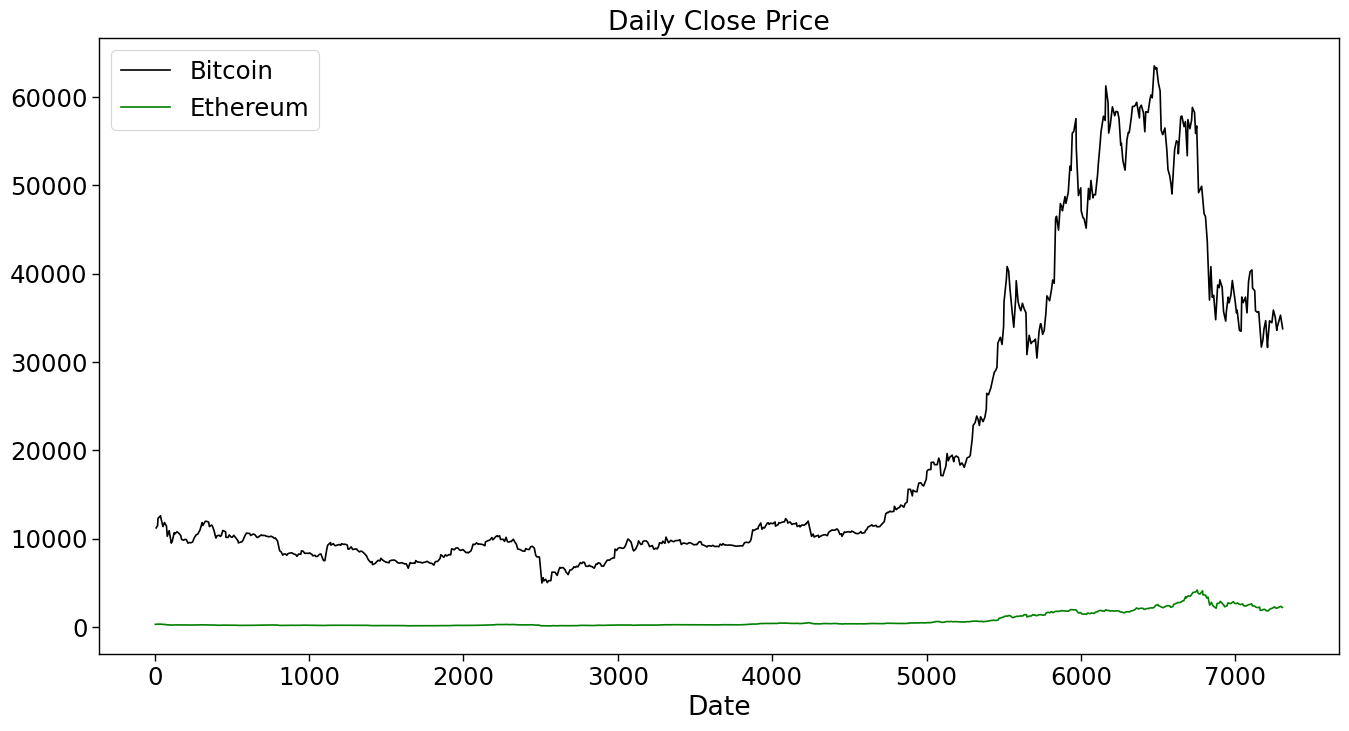

In [725]:
plt.figure(figsize=(16,8))
btc['Close'].plot(label='Bitcoin', color="black")
eth['Close'].plot(label='Ethereum', color="green")


plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

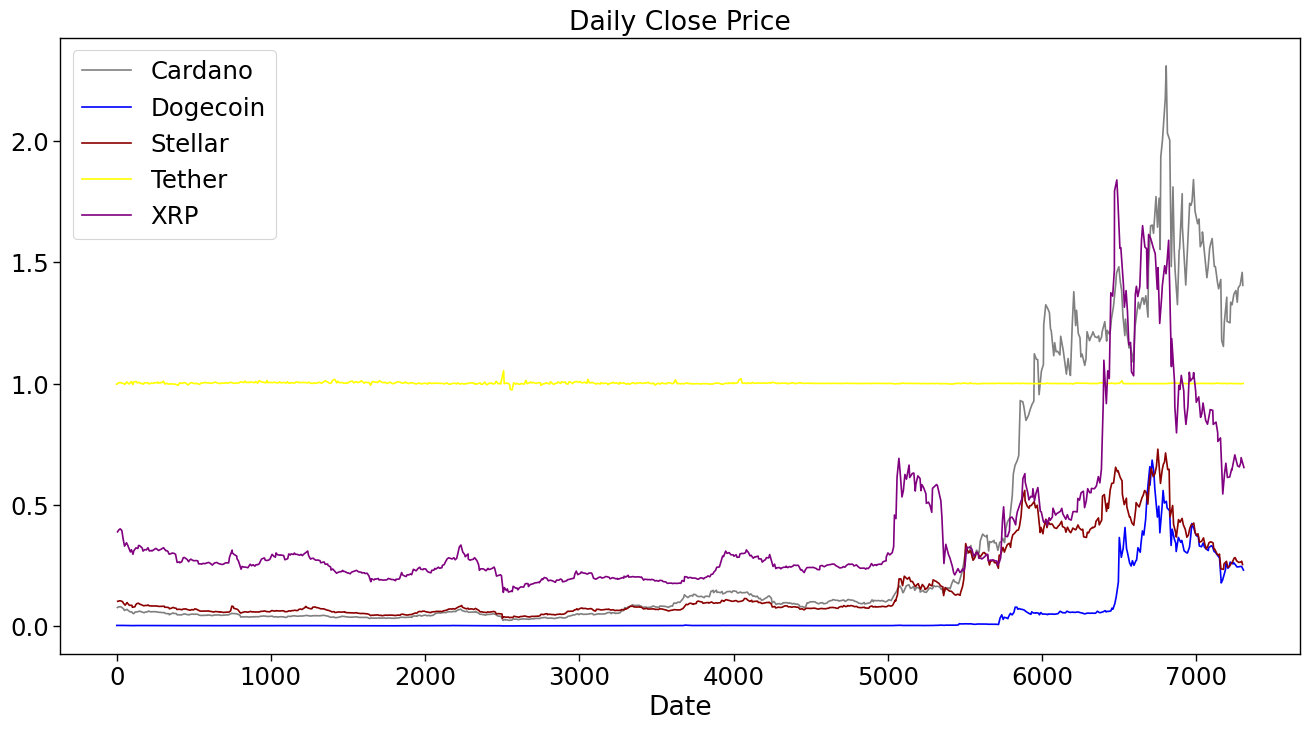

In [726]:
plt.figure(figsize=(16,8))

cda['Close'].plot(label='Cardano', color="gray")
doge['Close'].plot(label='Dogecoin', color="blue")
tlr['Close'].plot(label='Stellar', color="darkred")
thr['Close'].plot(label='Tether', color="yellow")
xrp['Close'].plot(label='XRP', color="purple")

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

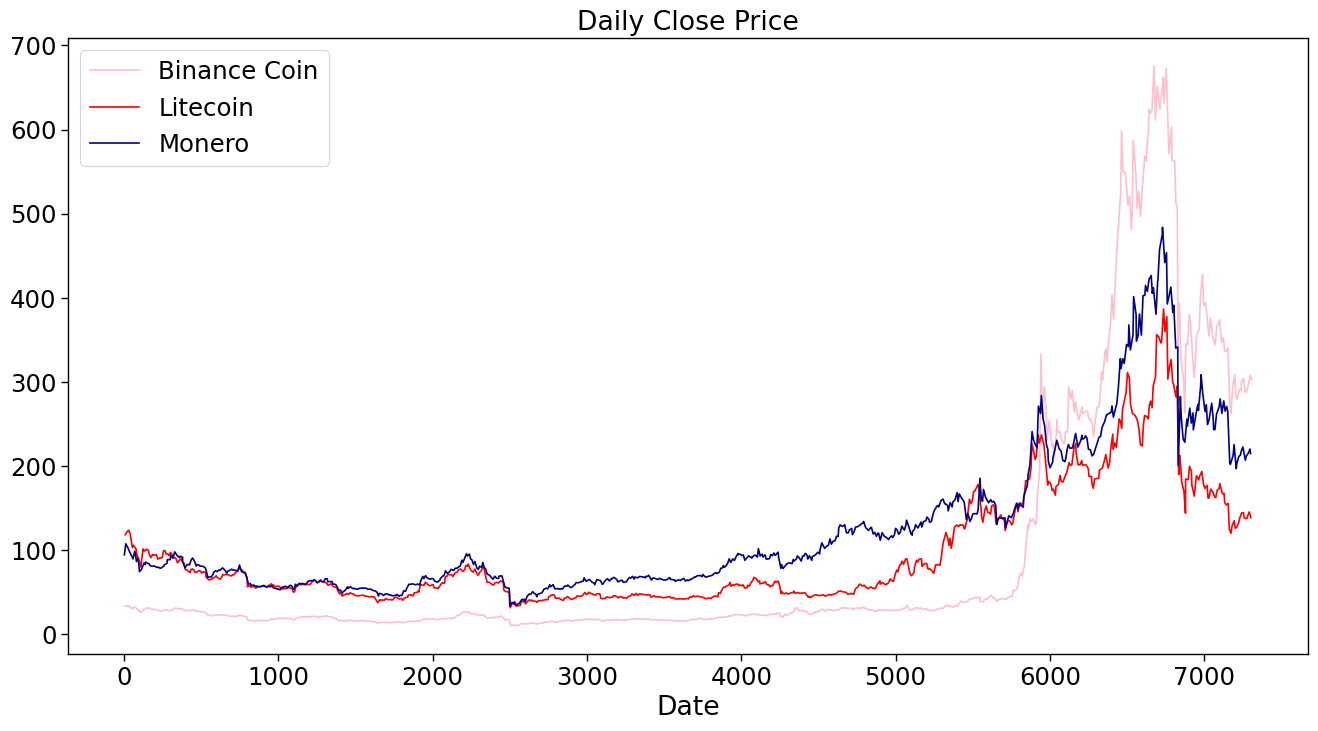

In [727]:
plt.figure(figsize=(16,8))


bnb['Close'].plot(label='Binance Coin', color="pink")
ltc['Close'].plot(label='Litecoin', color="red")
mnr['Close'].plot(label='Monero', color="darkblue")


plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

C:\Users\nency\AppData\Local\Temp\ipykernel_28552\503961212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily_Return'] = df['Close'].pct_change()
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\503961212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily_Return'] = df['Close'].pct_change()
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\503961212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

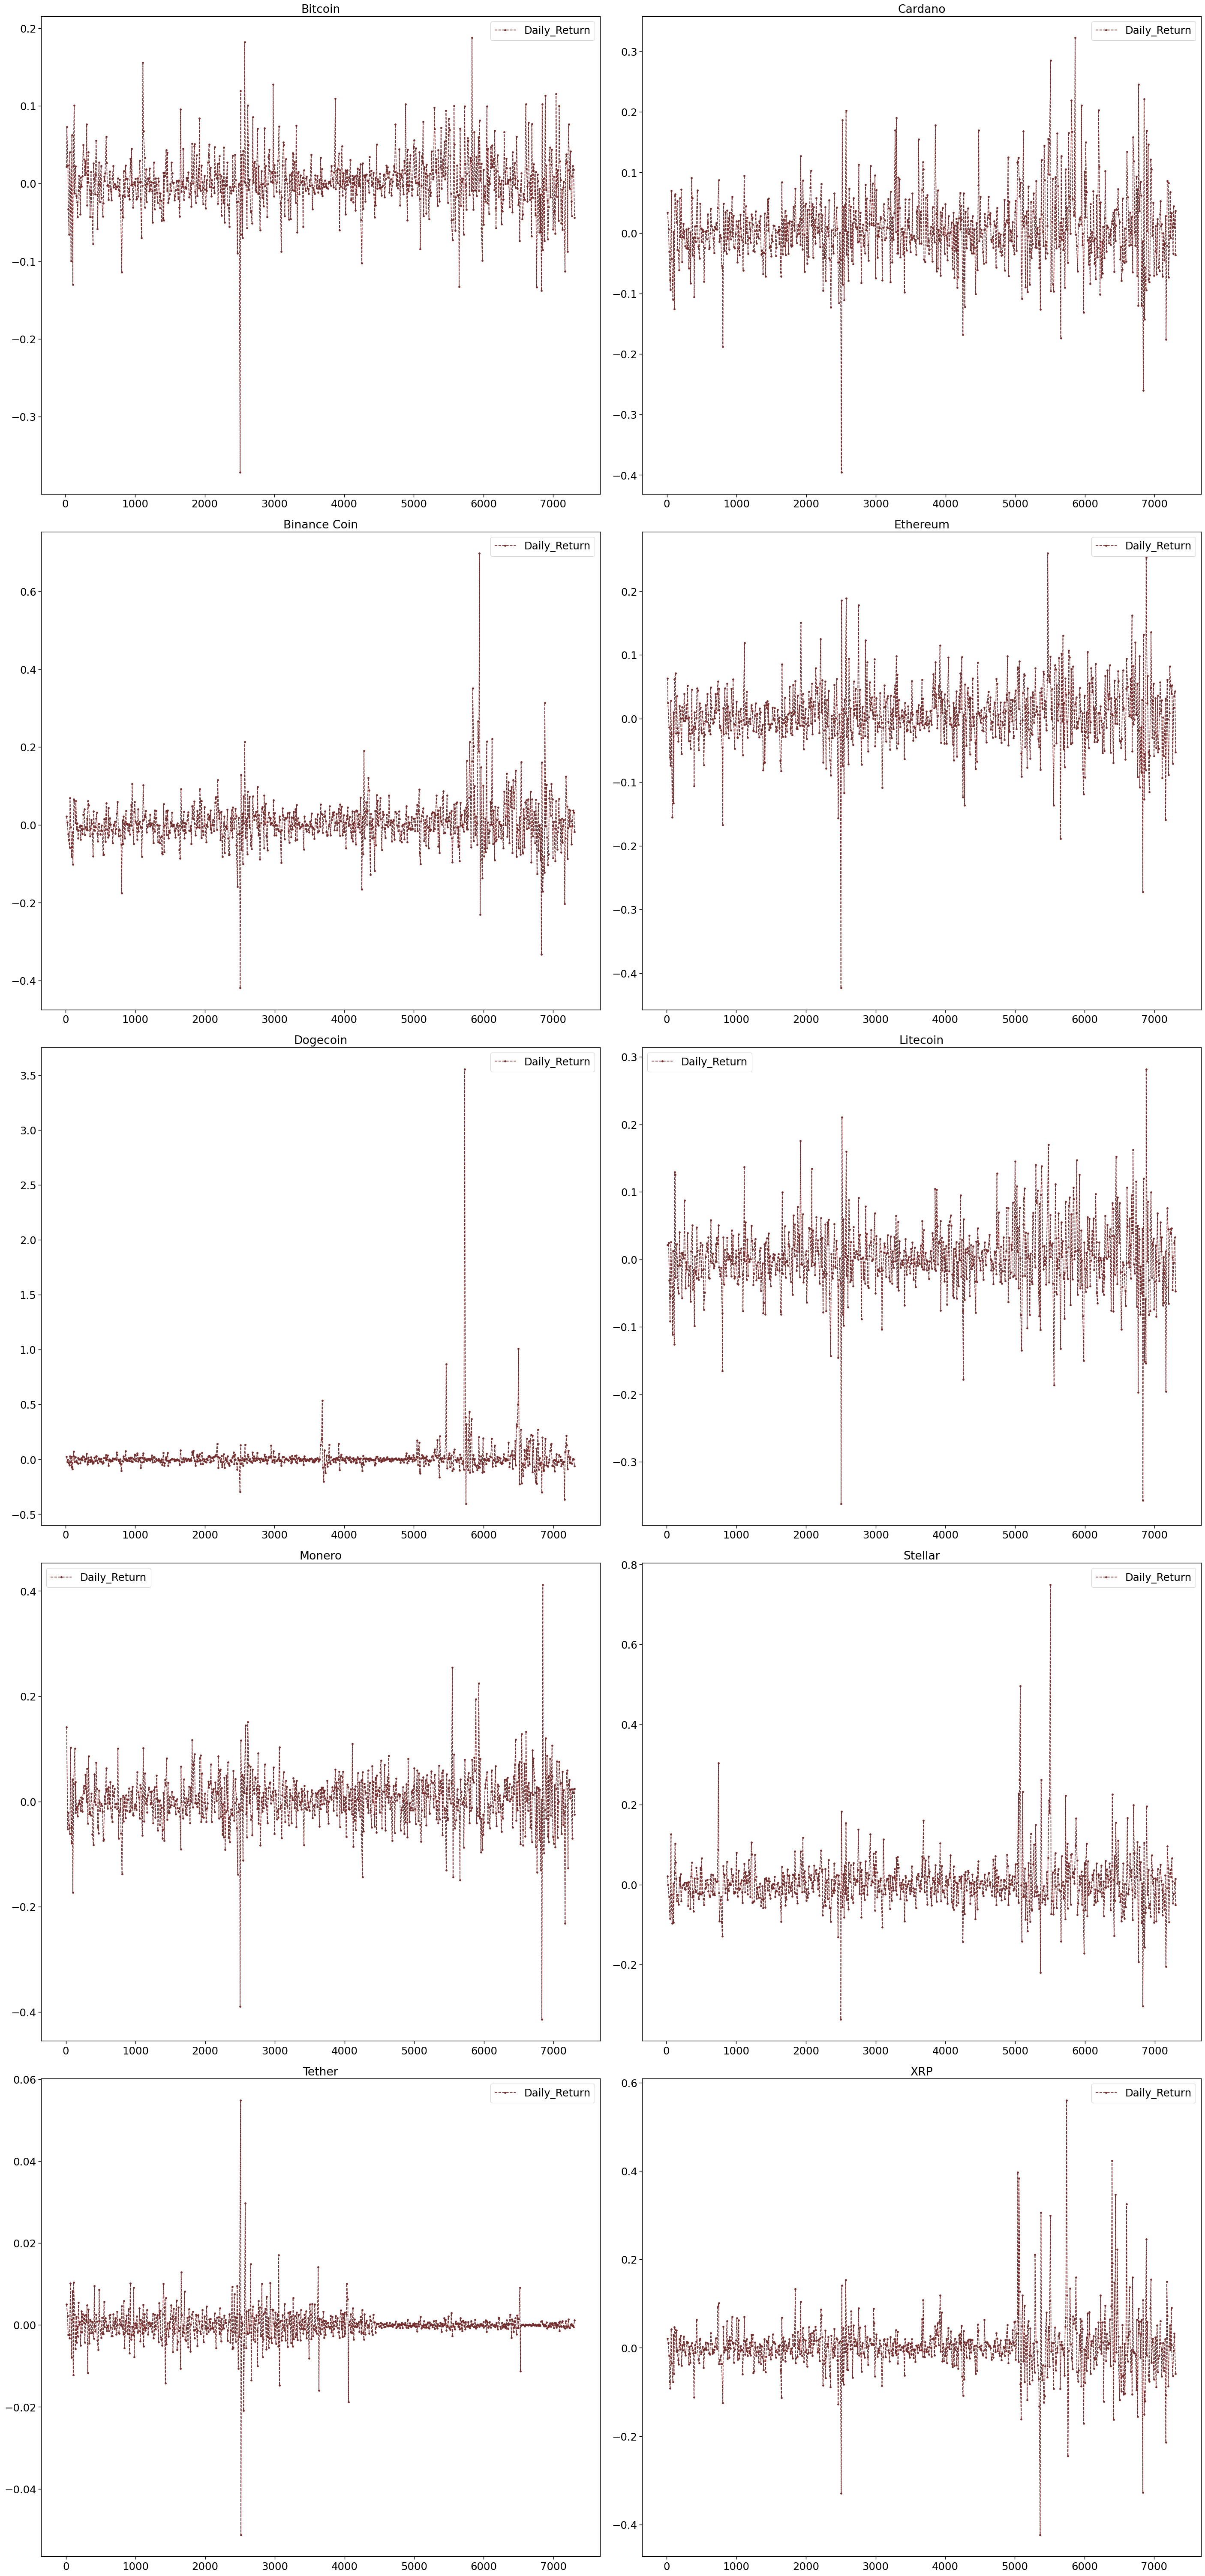

In [728]:
for df in cryptoDf:
    df['Daily_Return'] = df['Close'].pct_change()
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(14*total_cols, 12*total_rows), constrained_layout=True)
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    cryptoDf[i]['Daily_Return'].plot(ax=axs[row][pos], legend=True,color='#732C2C', linestyle='--', marker='.')
    axs[row][pos].set_title(crypto[i])

C:\Users\nency\AppData\Local\Temp\ipykernel_28552\1959117773.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot =sns.distplot(cryptoDf[i]['Daily_Return'], bins=100, color='#732C2C',ax=axs[row][pos])
C:\Users\nency\AppData\Local\Temp\ipykernel_28552\1959117773.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot

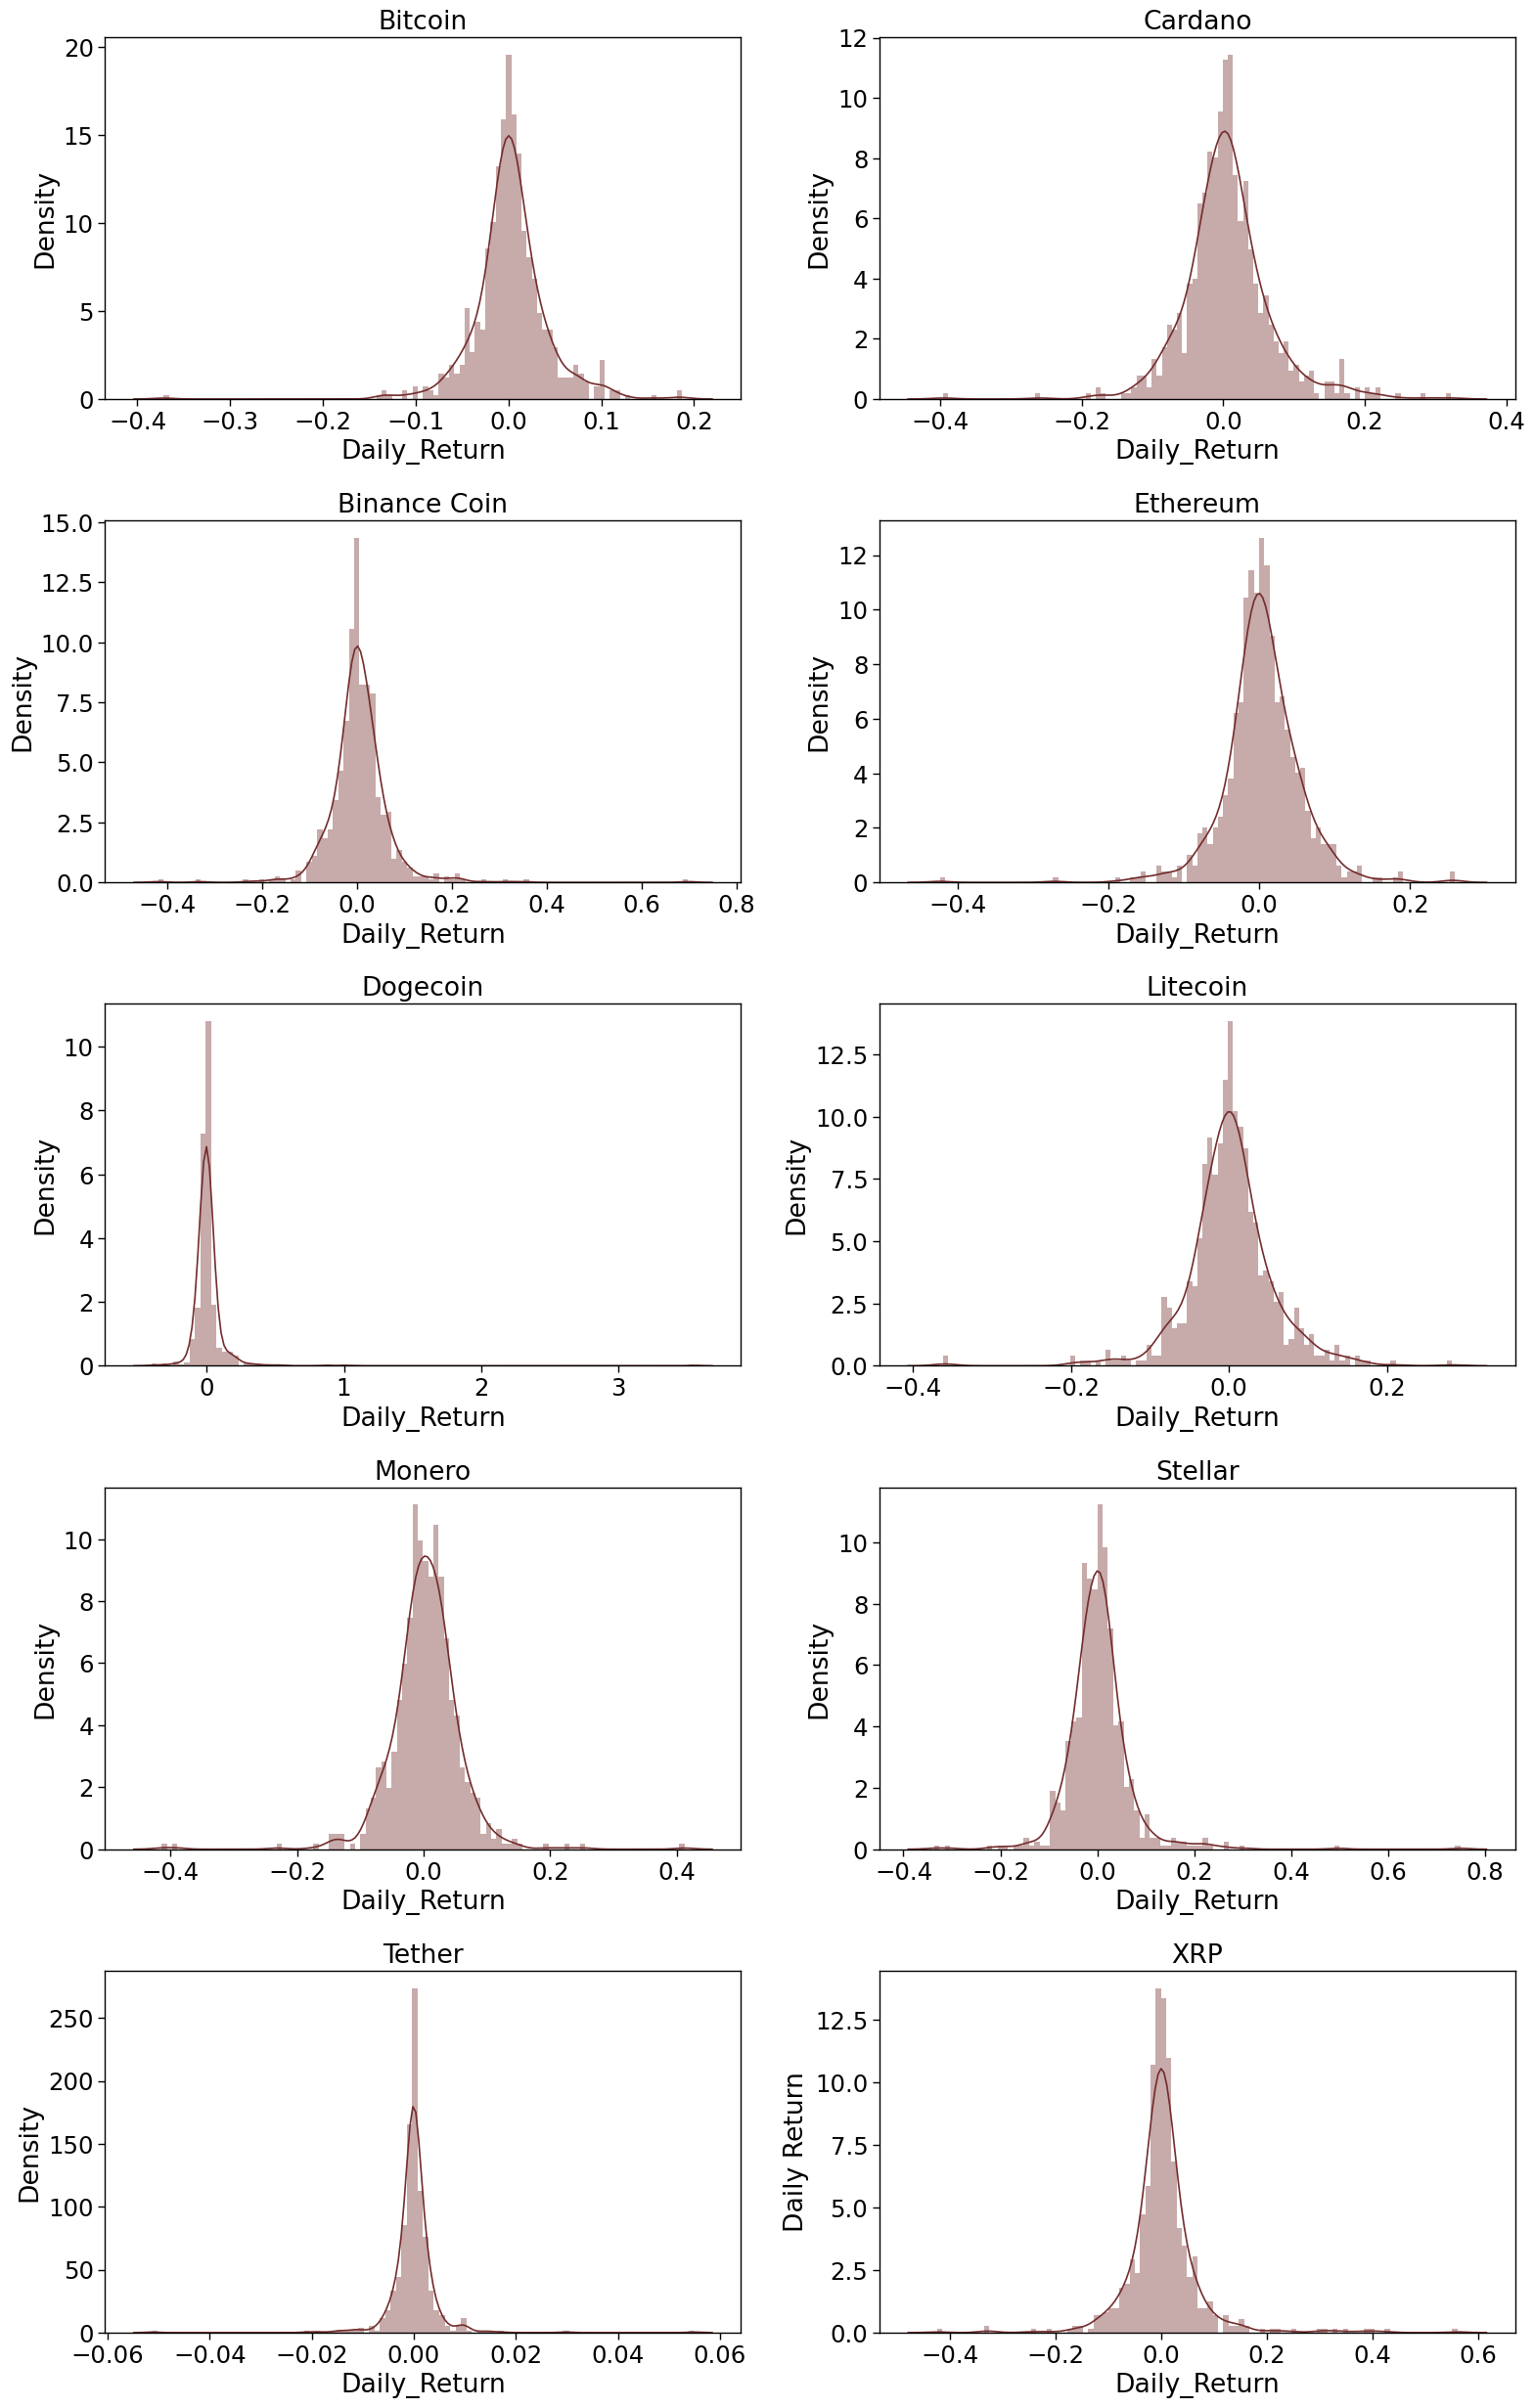

In [729]:
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(8*total_cols, 5*total_rows))
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    plot =sns.distplot(cryptoDf[i]['Daily_Return'], bins=100, color='#732C2C',ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])
    plt.ylabel('Daily Return')

plt.tight_layout()

In [730]:
# Fill NaN values in the original 'Close' columns before calculating percentage changes

closeDf=pd.DataFrame()
print(closeDf)

closeDf['btc'] = btc['Close']
closeDf['cda'] = cda['Close']
closeDf['bnb'] = bnb['Close']
closeDf['eth'] = eth['Close']
closeDf['doge'] = doge['Close']
closeDf['ltc'] = ltc['Close']
closeDf['mnr'] = mnr['Close']
closeDf['tlr'] = tlr['Close']
closeDf['thr'] = thr['Close']
closeDf['xrp'] = xrp['Close']

# Calculate percentage change
returns = closeDf.pct_change()
returns.head()


Empty DataFrame
Columns: []
Index: []


C:\Users\nency\AppData\Local\Temp\ipykernel_28552\1455286189.py:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = closeDf.pct_change()


btc  cda  bnb  eth  doge  ltc  mnr  tlr  thr  xrp
9        NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN
18  0.021617  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN
21  0.072930  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN
37  0.023430  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN
42 -0.033188  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN

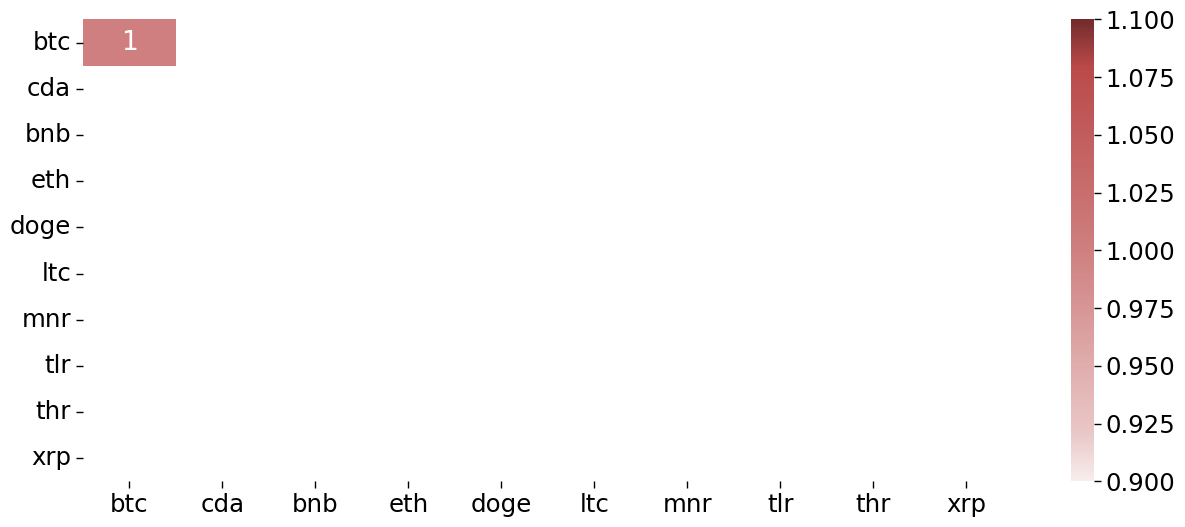

In [731]:
# Create heatmap for correlation of each coin
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#F8EDED', '#EAC8C8', '#CF7F7F', '#BA4949', '#732C2C']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)
plt.figure(figsize=(15,6))
sns.heatmap(returns.corr(), annot=True, cmap=cm)
plt.show()

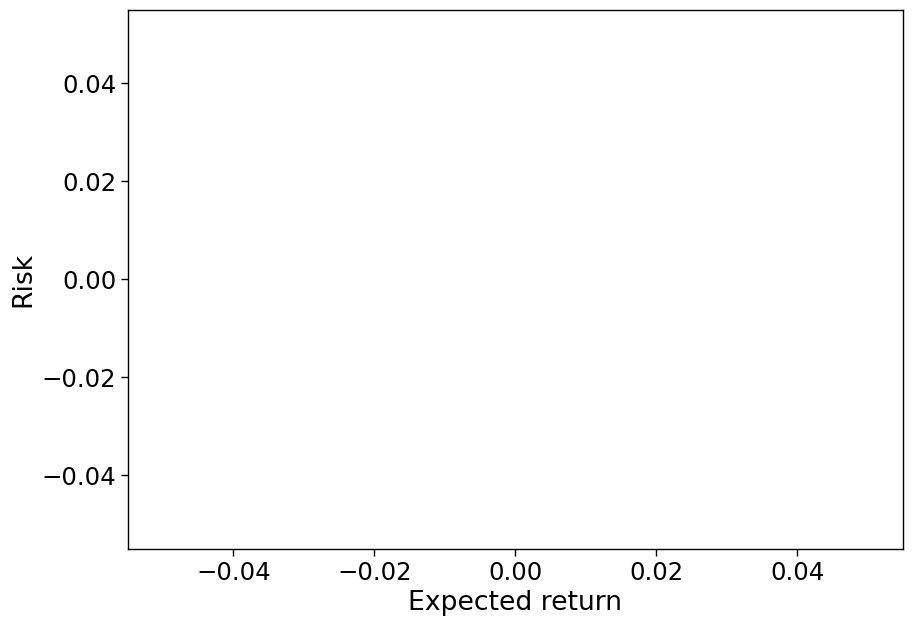

In [732]:
rets = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='#732C2C', connectionstyle='arc3,rad=-0.3'))